In this project we aim to understand the financial health or the fundamental analysis of GMM Pfaudler.

GMM Pfaudler is a market leader of glass lined equipments in India with over 55% market share in the segment.

It is a leading supplier of process equipments to the pharmaceutical and chemical industries.
Over the years GMMP has diversified its product portfolio to include Mixing Systems, Filtration & Drying Equipment, Engineered Systems and Heavy Engineering Equipments. 


In This Project we aim at analysing the Return on Capital Employed and the profit and profit Margins of the company over various time frames to judge the financial strength of the company and whether the company is investment worthy using python.

We will be reading data from the 3 financial statements(Balance Sheet, Profit and Loss Statment nd the Cash Flow Statement) and loading them into python ad then making our analysis.

In [ ]:
import pandas as pd
import numpy as np
from pprintpp import pprint
import datetime
import matplotlib.pyplot as plt
import seaborn as sns

In [ ]:
bs = pd.read_excel("GMM_pfaudler.xlsx", sheet_name = 'Balance_Sheets') #BALANCE SHEET LOADED HERE
bs.head()

,Unnamed: 0,2021-03-01 00:00:00,2020-03-01 00:00:00,2019-03-01 00:00:00,2018-03-01 00:00:00,2017-03-01 00:00:00,2016-03-01 00:00:00,2015-03-01 00:00:00,2014-03-01 00:00:00,2013-03-01 00:00:00,2012-03-01 00:00:00
0,EQUITIES AND LIABILITIES,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
1,SHAREHOLDER'S FUNDS,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2,Equity Share Capital,2.92,2.92,2.92,2.92,2.92,2.92,2.92,2.92,2.92,2.92
3,Total Share Capital,2.92,2.92,2.92,2.92,2.92,2.92,2.92,2.92,2.92,2.92
4,Reserves and Surplus,404.22,340.00,266.01,224.83,190.90,163.91,147.51,136.04,116.36,111.46


In [ ]:
pnl = pd.read_excel("GMM_pfaudler.xlsx", sheet_name = 'PnL') #PROFIT AND LOSS STATEMENT LOADED HERE
pnl.head()

,Unnamed: 0,2021-03-01 00:00:00,2020-03-01 00:00:00,2019-03-01 00:00:00,2018-03-01 00:00:00,2017-03-01 00:00:00,2016-03-01 00:00:00,2015-03-01 00:00:00,2014-03-01 00:00:00,2013-03-01 00:00:00,2012-03-01 00:00:00
0,INCOME,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
1,Revenue From Operations [Gross],994.96,586.53,495.42,406.73,374.30,306.42,318.57,288.71,223.57,262.07
2,Less: Excise/Sevice Tax/Other Levies,0.00,0.00,0.00,5.26,25.09,17.31,14.30,13.75,14.80,14.94
3,Revenue From Operations [Net],994.96,586.53,495.42,401.46,349.21,289.11,304.27,274.95,208.77,247.13
4,Other Operating Revenues,6.16,4.54,7.22,4.24,3.82,2.97,3.36,3.83,4.12,5.30


In [ ]:
pnl.columns

Index([       'Unnamed: 0', 2021-03-01 00:00:00, 2020-03-01 00:00:00,
       2019-03-01 00:00:00, 2018-03-01 00:00:00, 2017-03-01 00:00:00,
       2016-03-01 00:00:00, 2015-03-01 00:00:00, 2014-03-01 00:00:00,
       2013-03-01 00:00:00, 2012-03-01 00:00:00],
      dtype='object')

In [ ]:
pnl['Unnamed: 0'] #P&L ROWS

0                                                INCOME
1                       Revenue From Operations [Gross]
2                  Less: Excise/Sevice Tax/Other Levies
3                         Revenue From Operations [Net]
4                              Other Operating Revenues
5                              Total Operating Revenues
6                                          Other Income
7                                         Total Revenue
8                                              EXPENSES
9                            Cost Of Materials Consumed
10    Changes In Inventories Of FG,WIP And Stock-In ...
11                            Employee Benefit Expenses
12                                        Finance Costs
13               Depreciation And Amortisation Expenses
14                                       Other Expenses
15                                       Total Expenses
16    Profit/Loss Before Exceptional, ExtraOrdinary ...
17                                    Exceptiona

In [ ]:
bs.columns

Index([       'Unnamed: 0', 2021-03-01 00:00:00, 2020-03-01 00:00:00,
       2019-03-01 00:00:00, 2018-03-01 00:00:00, 2017-03-01 00:00:00,
       2016-03-01 00:00:00, 2015-03-01 00:00:00, 2014-03-01 00:00:00,
       2013-03-01 00:00:00, 2012-03-01 00:00:00],
      dtype='object')

In [ ]:
bs['Unnamed: 0'] #BALANCE SHEET ROWS

0                        EQUITIES AND LIABILITIES
1                             SHAREHOLDER'S FUNDS
2                            Equity Share Capital
3                             Total Share Capital
4                            Reserves and Surplus
5                      Total Reserves and Surplus
6                        Total Shareholders Funds
7                               Minority Interest
8                         NON-CURRENT LIABILITIES
9                            Long Term Borrowings
10                 Deferred Tax Liabilities [Net]
11                    Other Long Term Liabilities
12                           Long Term Provisions
13                  Total Non-Current Liabilities
14                            CURRENT LIABILITIES
15                          Short Term Borrowings
16                                 Trade Payables
17                      Other Current Liabilities
18                          Short Term Provisions
19                      Total Current Liabilities


In [ ]:
#% PROFIT AFTER TAX GROWTH OF THE COMPANY
PAT = pnl.loc[28,:].to_dict()
PAT.pop('Unnamed: 0')
keys = list(PAT.keys())
PAT_percent_growth = {}
for i in range(len(keys)-1):
    PAT_percent_growth[keys[i]] = (PAT[keys[i]]- PAT[keys[i+1]])*100/PAT[keys[i+1]]
pprint(PAT_percent_growth)

{
    datetime.datetime(2013, 3, 1, 0, 0): -2.4169184290030232,
    datetime.datetime(2014, 3, 1, 0, 0): 96.69762641898865,
    datetime.datetime(2015, 3, 1, 0, 0): -0.9968520461699777,
    datetime.datetime(2016, 3, 1, 0, 0): 6.624271330153682,
    datetime.datetime(2017, 3, 1, 0, 0): 54.67196819085487,
    datetime.datetime(2018, 3, 1, 0, 0): 37.146529562981996,
    datetime.datetime(2019, 3, 1, 0, 0): 18.509840674789125,
    datetime.datetime(2020, 3, 1, 0, 0): 40.628706998813755,
    datetime.datetime(2021, 3, 1, 0, 0): 3.1351047378040264,
}


In [ ]:
#%REVENUE GROWTH OF COMAPANY
revenue = pnl.loc[7,:].to_dict()
revenue.pop('Unnamed: 0')
keys2 = list(revenue.keys())
revenue_percent_growth = {}
for i in range(len(keys2)-1):
    revenue_percent_growth[keys2[i]] = (revenue[keys2[i]]- revenue[keys2[i+1]])*100/revenue[keys2[i+1]]
pprint(revenue_percent_growth)

{
    datetime.datetime(2013, 3, 1, 0, 0): -14.913890733002695,
    datetime.datetime(2014, 3, 1, 0, 0): 29.709014136221782,
    datetime.datetime(2015, 3, 1, 0, 0): 9.76964721701285,
    datetime.datetime(2016, 3, 1, 0, 0): -4.674102250016118,
    datetime.datetime(2017, 3, 1, 0, 0): 21.303936155823074,
    datetime.datetime(2018, 3, 1, 0, 0): 15.714206066012473,
    datetime.datetime(2019, 3, 1, 0, 0): 23.127514514924474,
    datetime.datetime(2020, 3, 1, 0, 0): 16.77591030933888,
    datetime.datetime(2021, 3, 1, 0, 0): 71.67367592111654,
}


In [ ]:
#CALCULATING THE DEPRECIATION AND AMORTIZATION EXPENSES IN P&L
dep_amort = pnl.loc[13,:]
pprint(dep_amort)
#HERE WE CAN SEE THAT THEY HAVE PUSHED OF MAX DEPRECIATION AND AMORTIZATION TO 2021 SO THEIR PROFITS HAVE TAKEN A SHORT TERM HIT

Unnamed: 0             Depreciation And Amortisation Expenses
2021-03-01 00:00:00                                     50.55
2020-03-01 00:00:00                                     21.12
2019-03-01 00:00:00                                     10.97
2018-03-01 00:00:00                                      9.79
2017-03-01 00:00:00                                      8.23
2016-03-01 00:00:00                                      8.12
2015-03-01 00:00:00                                      9.83
2014-03-01 00:00:00                                       8.9
2013-03-01 00:00:00                                      7.24
2012-03-01 00:00:00                                      6.38
Name: 13, dtype: object


In [ ]:
#CALCULATING EBIT(EARNINGS BEFORE INTEREST AND TAXES)
tot_rev = pnl.loc[7,:].to_dict()
tot_exp = pnl.loc[15,:].to_dict()
tot_rev.pop('Unnamed: 0')
tot_exp.pop('Unnamed: 0')
EBIT = {}
for key in tot_rev.keys():
    EBIT[key] = tot_rev[key] - tot_exp[key]
pprint(EBIT)

{
    datetime.datetime(2012, 3, 1, 0, 0): 14.069999999999993,
    datetime.datetime(2013, 3, 1, 0, 0): 13.409999999999997,
    datetime.datetime(2014, 3, 1, 0, 0): 27.090000000000003,
    datetime.datetime(2015, 3, 1, 0, 0): 28.190000000000055,
    datetime.datetime(2016, 3, 1, 0, 0): 29.80000000000001,
    datetime.datetime(2017, 3, 1, 0, 0): 44.06,
    datetime.datetime(2018, 3, 1, 0, 0): 60.64999999999998,
    datetime.datetime(2019, 3, 1, 0, 0): 73.26999999999998,
    datetime.datetime(2020, 3, 1, 0, 0): 92.29000000000002,
    datetime.datetime(2021, 3, 1, 0, 0): 101.37999999999988,
}


In [ ]:
#CALCULATING THE LIABILTIES OF THE COMPANY
tot_c_liabilities = bs.loc[19,:]
tot_c_liabilities.pop('Unnamed: 0')
pprint(tot_c_liabilities)

2021-03-01 00:00:00    802.43
2020-03-01 00:00:00    164.46
2019-03-01 00:00:00    144.66
2018-03-01 00:00:00    147.26
2017-03-01 00:00:00    113.78
2016-03-01 00:00:00     85.02
2015-03-01 00:00:00     80.04
2014-03-01 00:00:00     91.01
2013-03-01 00:00:00     70.75
2012-03-01 00:00:00     63.05
Name: 19, dtype: object


In [ ]:
#CALCULATING THE ASSETS OF THE COMPANY
tot_assets = bs.loc[41, :].to_dict()
tot_assets.pop('Unnamed: 0')
pprint(tot_assets)

{
    datetime.datetime(2012, 3, 1, 0, 0): 183.2,
    datetime.datetime(2013, 3, 1, 0, 0): 195.32,
    datetime.datetime(2014, 3, 1, 0, 0): 234.64,
    datetime.datetime(2015, 3, 1, 0, 0): 234.37,
    datetime.datetime(2016, 3, 1, 0, 0): 255.64,
    datetime.datetime(2017, 3, 1, 0, 0): 318.42,
    datetime.datetime(2018, 3, 1, 0, 0): 392.33,
    datetime.datetime(2019, 3, 1, 0, 0): 434.38,
    datetime.datetime(2020, 3, 1, 0, 0): 543.49,
    datetime.datetime(2021, 3, 1, 0, 0): 2417.49,
}


In [ ]:
#CALCULATING THE RETURN OF CAPITAL EMPLOYED OF THE COMPANY.
roce = {}
keys3 = list(EBIT.keys())
for key in keys3:
    roce[key] = (EBIT[key] * 100)/(tot_assets[key]  - tot_c_liabilities[key])
pprint(roce)

{
    datetime.datetime(2012, 3, 1, 0, 0): 11.710362047440695,
    datetime.datetime(2013, 3, 1, 0, 0): 10.76503170907923,
    datetime.datetime(2014, 3, 1, 0, 0): 18.86096219452761,
    datetime.datetime(2015, 3, 1, 0, 0): 18.266053262489507,
    datetime.datetime(2016, 3, 1, 0, 0): 17.465713280975272,
    datetime.datetime(2017, 3, 1, 0, 0): 21.530492572322125,
    datetime.datetime(2018, 3, 1, 0, 0): 24.748031174766385,
    datetime.datetime(2019, 3, 1, 0, 0): 25.28993510976114,
    datetime.datetime(2020, 3, 1, 0, 0): 24.34899612167903,
    datetime.datetime(2021, 3, 1, 0, 0): 6.277166173392932,
}


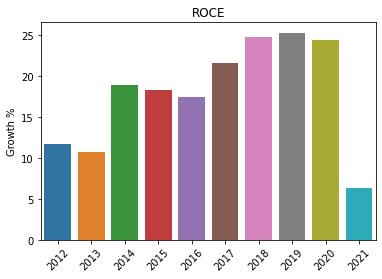

In [ ]:
#BAR PLOT TO SHOW THE GROWTH % OF ROCE HAS BEEN SUBSTANTIAL ACROSS THE YEARS >20% AGGREGRATE IN THE LAST 10 YEARS
X_roce = [key.year for key in roce.keys()]
Y_roce = [roce[key] for key in roce.keys()]
sns.barplot(x = X_roce, y = Y_roce)
plt.xticks(rotation = 45)
plt.title("ROCE")
plt.ylabel("Growth %")
plt.show()

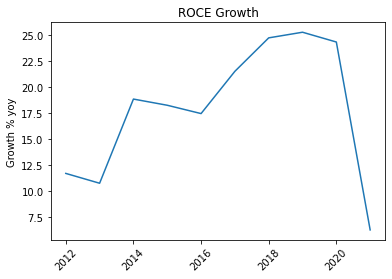

In [ ]:
#BAR PLOT TO UNDERSTAND THE ROCE GROWTH IN 10 YEARS
plt.plot(X_roce, Y_roce)
plt.xticks(rotation = 45)
plt.title("ROCE Growth")
plt.ylabel("Growth % yoy")
plt.show()

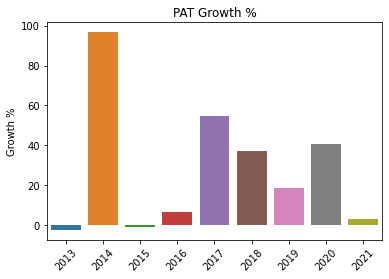

In [ ]:
#BAR PLOT TO SHOW THE PROFIT GROWTH OVER THE LAST 10 YEARS.
X_pat_growth = [key.year for key in PAT_percent_growth.keys()]
Y_pat_growth = [PAT_percent_growth[key] for key in PAT_percent_growth.keys()]
sns.barplot(x = X_pat_growth, y = Y_pat_growth)
plt.xticks(rotation = 45)
plt.title("PAT Growth %")
plt.ylabel("Growth %")
plt.show()